<a href="https://colab.research.google.com/github/ranjankumar22062/Deeplearning-projects/blob/main/DL_Project_2_MNIST_Digit_classification_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WORK FLOW
data set-imageprocessing-train test split-Neural-Network
new image -trained model - hand written prediction


In [33]:
#importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix





In [34]:
#loading datasets for keras
(X_train,Y_train) ,(X_test,Y_test) = mnist.load_data()

In [35]:
type(X_train)

numpy.ndarray

In [36]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data


test data =6000

image dimension-->28*28

Grayscale Image-->1 channel


In [37]:
print(X_train[50].shape)

(28, 28)


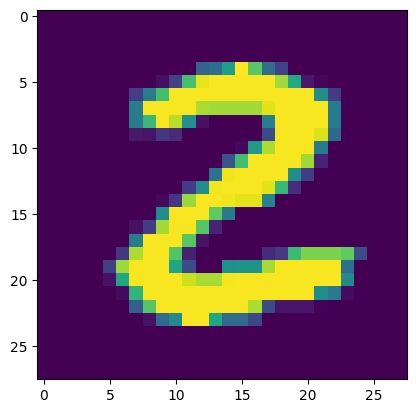

In [38]:
#displaying image
plt.imshow(X_train[25])
plt.show()

In [39]:
#image labels
print(Y_train.shape,Y_test.shape)


(60000,) (10000,)


In [40]:
#unique values in Y_train
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one hot encoding

all the image have the same dimension in the data sets if not we have to resize all the image

In [41]:
#scaling the values(normalization)

X_train = X_train/255
X_test = X_test/255

In [42]:
#building neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
#compiling the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8464 - loss: 0.5278
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9545 - loss: 0.1494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9666 - loss: 0.1075
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9740 - loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9783 - loss: 0.0695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9824 - loss: 0.0578
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9851 - loss: 0.0495
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9892 - loss: 0.0358
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0315


Accuracy on test data

In [45]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.1391


In [46]:
print(accuracy)

0.9700999855995178


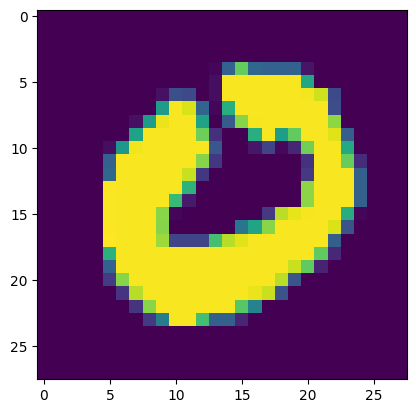

In [63]:
plt.imshow(X_test[25])
plt.show()

In [65]:
print(Y_test[25])

0


In [66]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
print(Y_pred.shape)

(10000, 10)


In [69]:
print(Y_pred[25])

[9.9999869e-01 3.9463884e-11 1.3414821e-04 1.1277248e-09 1.6909914e-01
 3.2907701e-04 1.1190094e-02 1.6124444e-02 1.0840584e-04 7.2794169e-01]


model.predict()gives the prediction probability of each class for that data point

In [71]:
#converting the prection probabilities to class label
label_for_first_image = np.argmax(Y_pred[25])
print(label_for_first_image)

0


In [72]:
Y_pred_labels = [np.argmax(i)for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [54]:
#confusion matrix
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [73]:
print(conf_mat)

tf.Tensor(
[[ 964    1    1    1    0    2    2    2    2    5]
 [   0 1115    3    4    1    0    6    1    5    0]
 [   5    1 1002    3    3    1    2    5   10    0]
 [   0    0    4  983    2    8    0    8    1    4]
 [   0    0    5    0  975    0    0    0    1    1]
 [   1    0    0   16    3  865    3    0    3    1]
 [   5    2    0    1    8    8  932    0    2    0]
 [   1    2    9    4    4    0    0  993    2   13]
 [   3    1    4   11    8    2    4    6  929    6]
 [   3    1    0    4   46    5    0    6    1  943]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'predicted Labels')

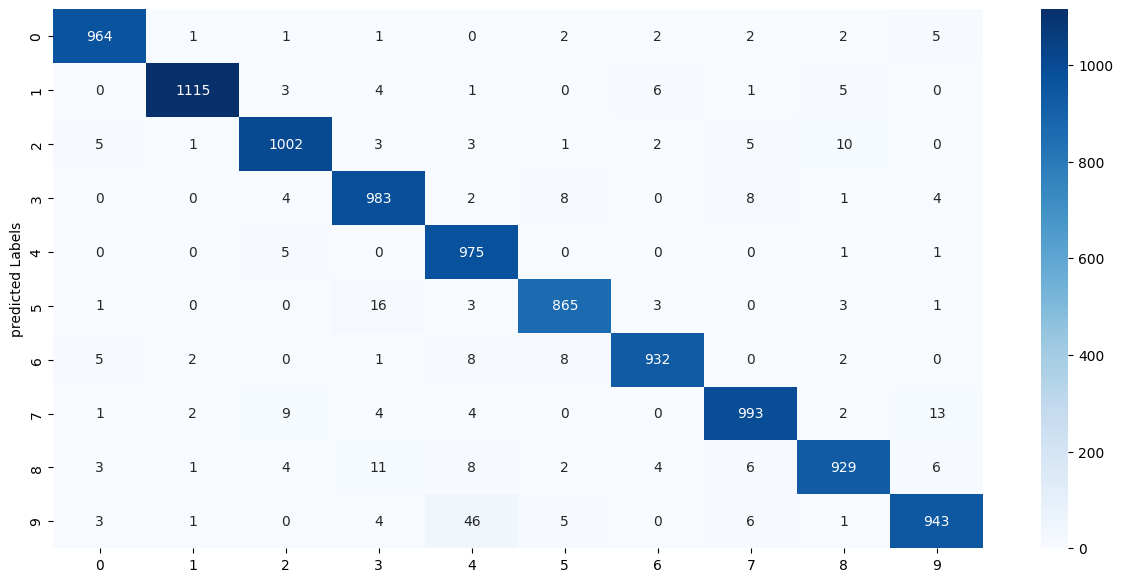

In [56]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('predicted Labels')

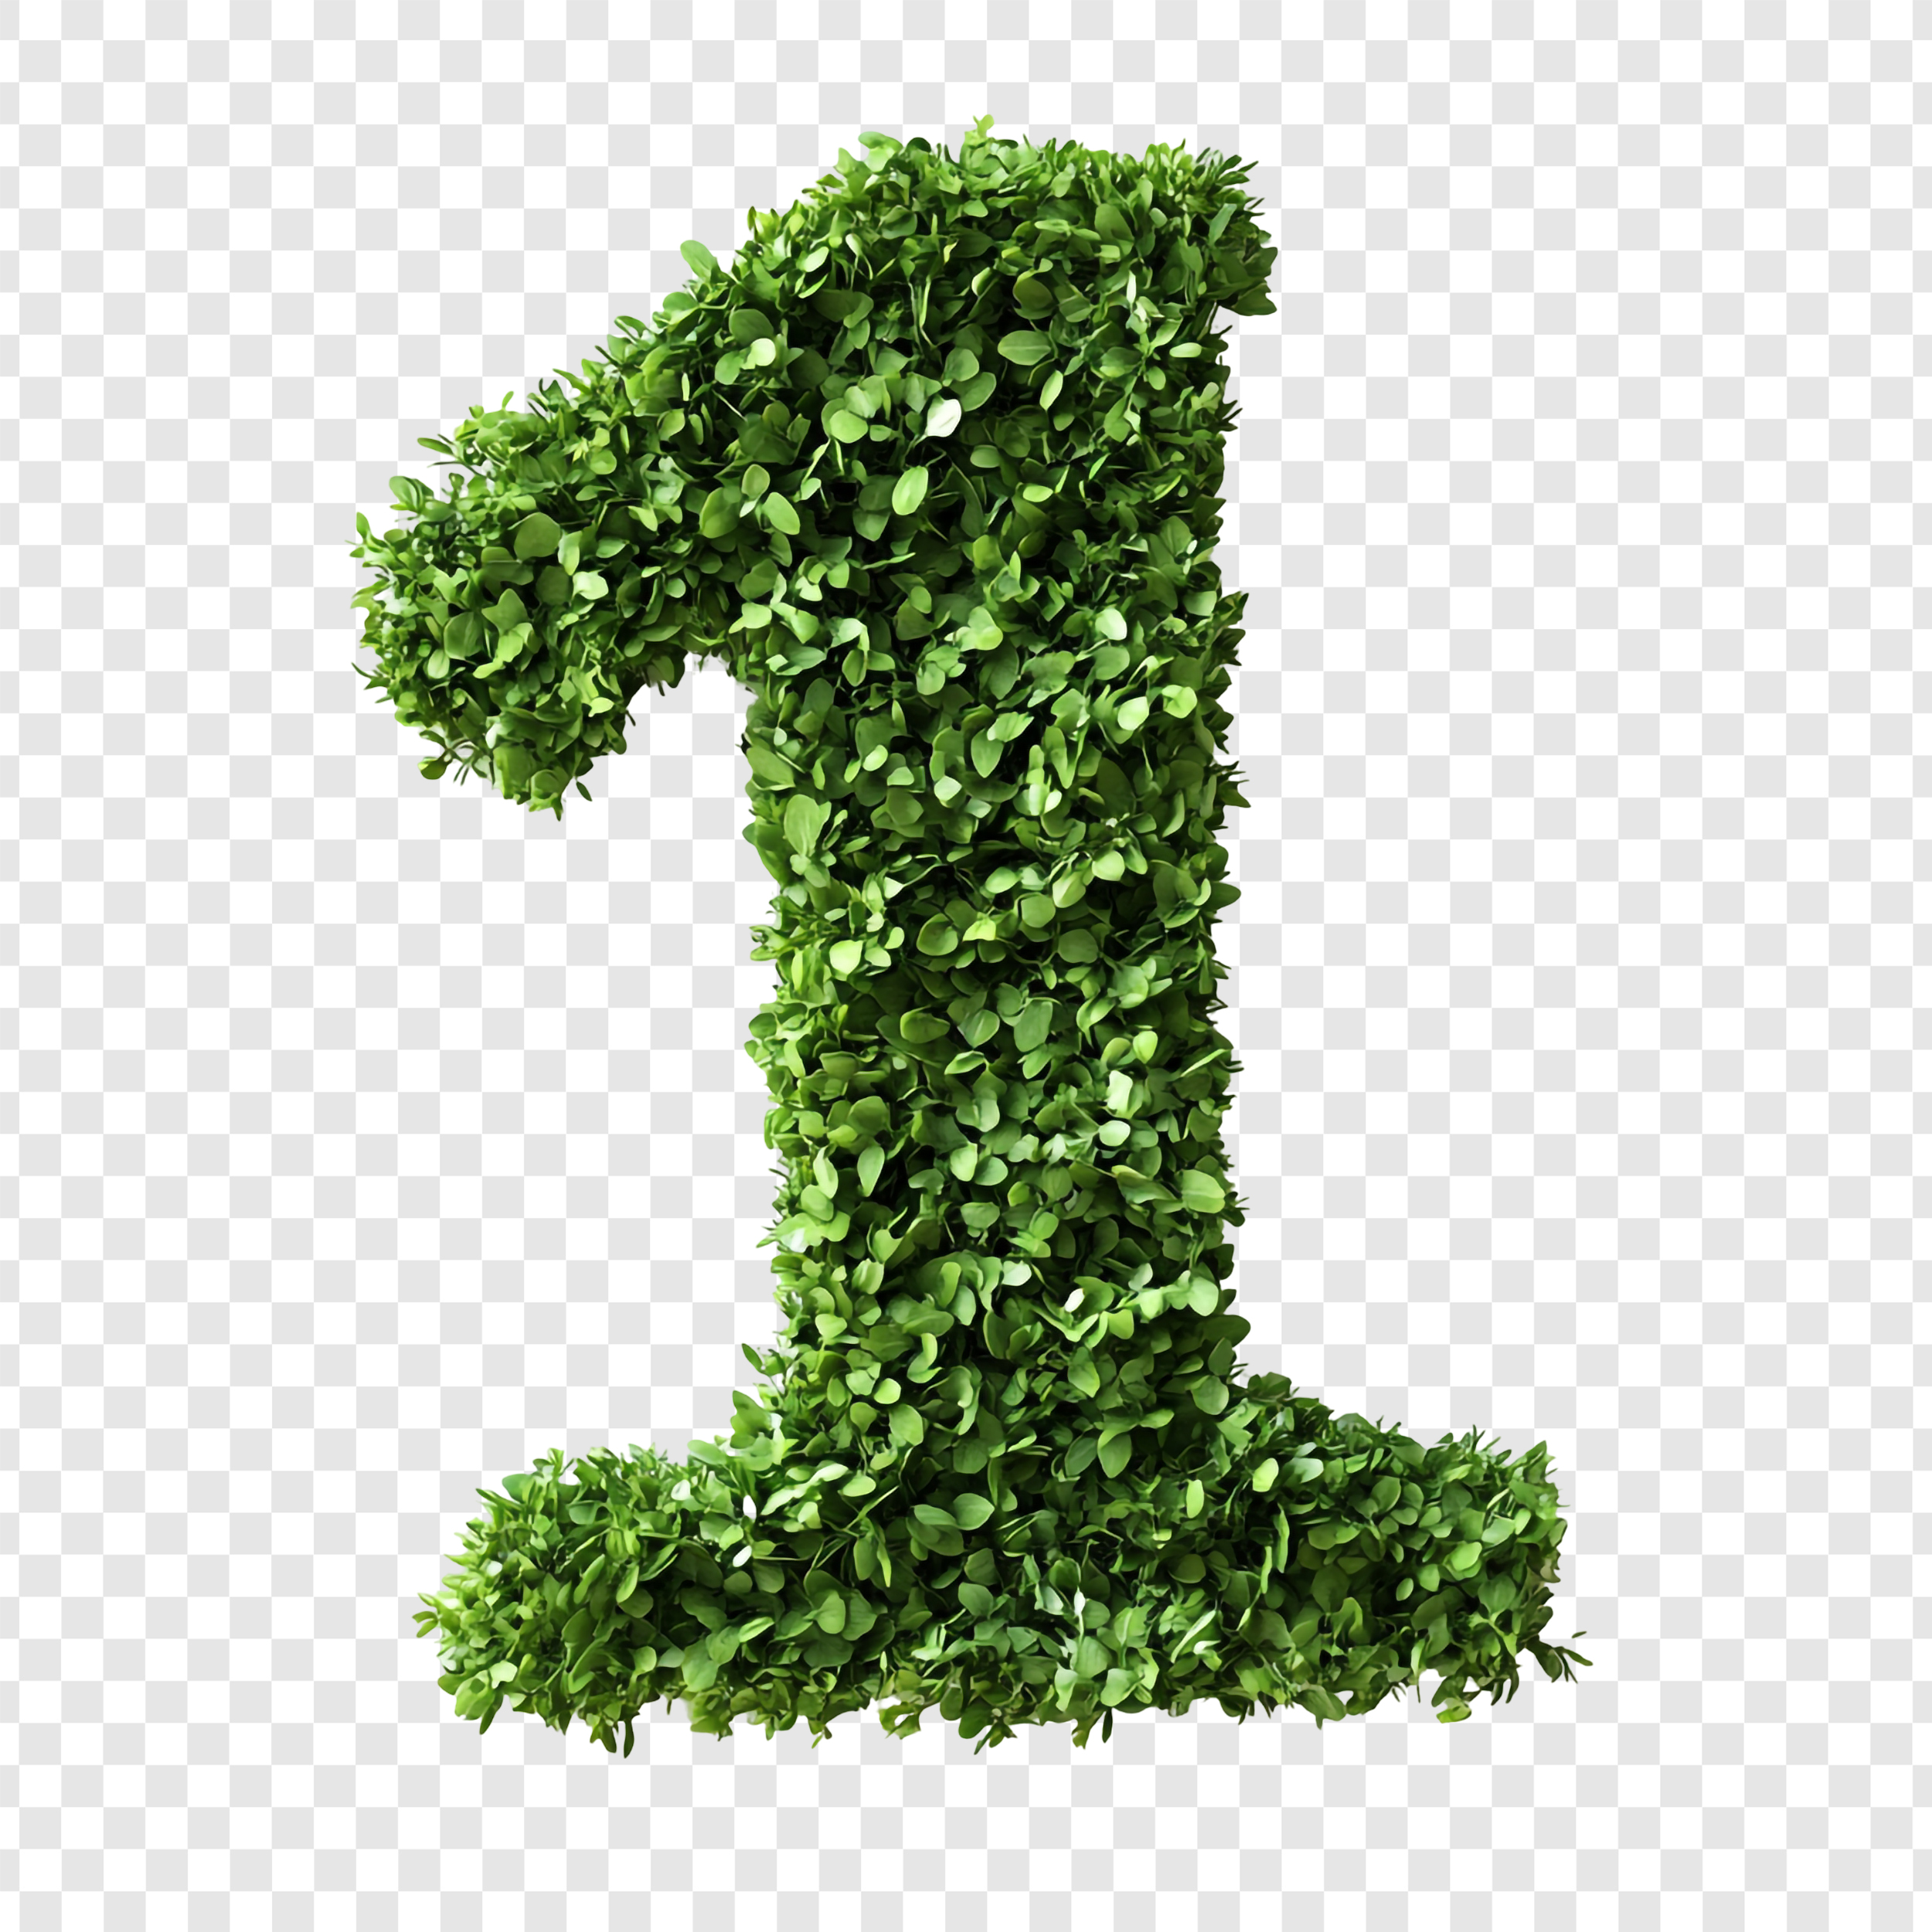

[[233 232 232 ... 232 232 232]
 [231 230 230 ... 230 230 230]
 [232 230 230 ... 230 230 230]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [80]:
#build predictive system
input_image_path='/content/fd2f19e3-1fac-489a-9cc2-479270321607.jpg'
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
type(input_image)
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
print(grayscale)



In [58]:
input_image_resize.shape

(28, 28)

In [81]:
input_image_resize= input_image_resize/255

In [82]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [83]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[1.0000000e+00 2.8177042e-31 1.0235675e-08 3.9806856e-12 1.5231346e-26
  1.6398982e-03 2.5089244e-09 9.9999428e-01 6.3262348e-07 3.6394961e-06]]


In [84]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

0
